In [14]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_results(results):
    for memory_type, data in results.items():
        # Extract pairwise similarities
        similarities = data["Pairwise Similarities"]
        
        # Prepare data for heatmap
        heatmap_data = []
        run_labels = sorted(set(run for pair in similarities.keys() for run in pair.split(" - ")))
        for run_i in run_labels:
            row = []
            for run_j in run_labels:
                if run_i == run_j:
                    row.append(1)  # max similarity with itself
                else:
                    pair = " - ".join(sorted([run_i, run_j]))
                    row.append(similarities.get(pair, 0))  # 0 if pair not found (shouldn't happen)
            heatmap_data.append(row)
        
        # Plot heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", xticklabels=run_labels, yticklabels=run_labels)
        plt.title(f"Similarities between runs for {memory_type}")
        plt.show()


def compare_runs(memory_dict):
    model = SentenceTransformer('all-MiniLM-L6-v2')

    results = {}

    # For each type of memory
    for memory_type, runs in memory_dict.items():
        avg_similarities = []
        pair_similarities = {}

        # Get a list of all sentences from all runs
        all_sentences = [sentence for run in runs.values() for sentence in run]
        # Compute embeddings for all sentences
        all_embeddings = model.encode(all_sentences)

        # For each pair of runs
        for i in range(len(runs)):
            for j in range(i + 1, len(runs)):
                # Compute embeddings for sentences in each run
                run_i_embeddings = all_embeddings[int(i) * len(runs[str(i)]) : (int(i) + 1) * len(runs[str(i)])]
                run_j_embeddings = all_embeddings[int(j) * len(runs[str(j)]) : (int(j) + 1) * len(runs[str(j)])]

                # Compute cosine similarities between all pairs of sentences in the two runs
                cos_sim = cosine_similarity(run_i_embeddings, run_j_embeddings)

                # Take the max similarity for each sentence in run i
                max_similarities = np.max(cos_sim, axis=1)

                # Compute average max similarity for this pair of runs
                avg_max_similarity = np.mean(max_similarities)
                avg_similarities.append(avg_max_similarity)

                pair_similarities[f"Run {i} - Run {j}"] = avg_max_similarity

        # Compute average similarity for this type of memory
        avg_similarity = np.mean(avg_similarities)

        results[memory_type] = {
            "Average Similarity": avg_similarity,
            "Pairwise Similarities": pair_similarities,
        }

    return results



In [17]:

# Define the path to the JSON file
file_path = "./multirun/2023-07-29/12-21-29/output.json"

# Open the file and load the dictionary
with open(file_path, "r") as json_file:
    memory_dict = json.load(json_file)

# Now 'dictionary' is a Python dictionary containing the data from the JSON file
res = compare_runs(memory_dict)
res

{'workmem': {'Average Similarity': 0.9999999,
  'Pairwise Similarities': {'Run 0 - Run 1': 0.9999999,
   'Run 0 - Run 2': 0.9999999,
   'Run 0 - Run 3': 0.9999999,
   'Run 0 - Run 4': 0.9999999,
   'Run 1 - Run 2': 0.9999999,
   'Run 1 - Run 3': 0.9999999,
   'Run 1 - Run 4': 0.9999999,
   'Run 2 - Run 3': 0.9999999,
   'Run 2 - Run 4': 0.9999999,
   'Run 3 - Run 4': 0.9999999}},
 'convomem': {'Average Similarity': 0.78517544,
  'Pairwise Similarities': {'Run 0 - Run 1': 0.82033926,
   'Run 0 - Run 2': 0.6720355,
   'Run 0 - Run 3': 0.83059853,
   'Run 0 - Run 4': 0.79692644,
   'Run 1 - Run 2': 0.8556249,
   'Run 1 - Run 3': 0.8230184,
   'Run 1 - Run 4': 0.6963989,
   'Run 2 - Run 3': 0.84685194,
   'Run 2 - Run 4': 0.6343384,
   'Run 3 - Run 4': 0.8756223}},
 'recentmem': {'Average Similarity': 0.9999999,
  'Pairwise Similarities': {'Run 0 - Run 1': 0.9999999,
   'Run 0 - Run 2': 0.9999999,
   'Run 0 - Run 3': 0.9999999,
   'Run 0 - Run 4': 0.99999994,
   'Run 1 - Run 2': 0.9999999,

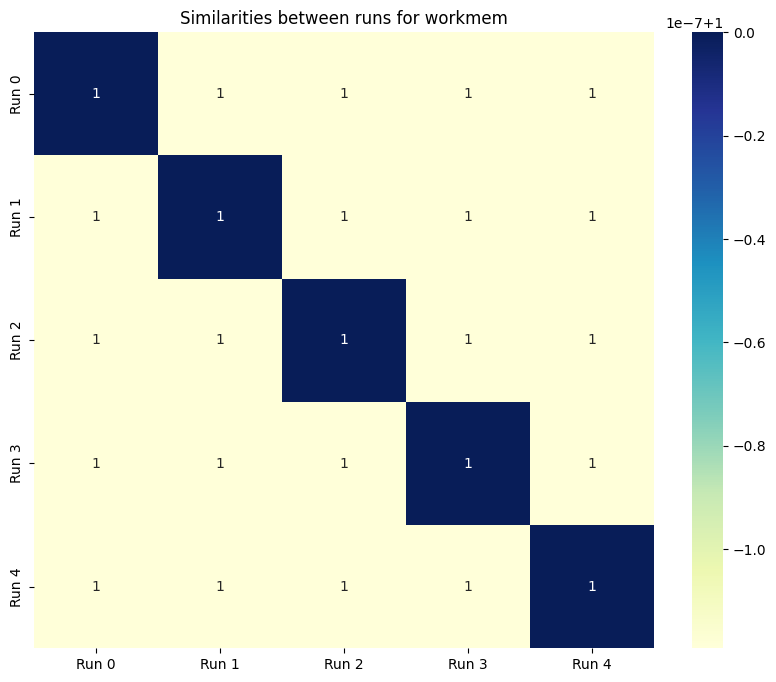

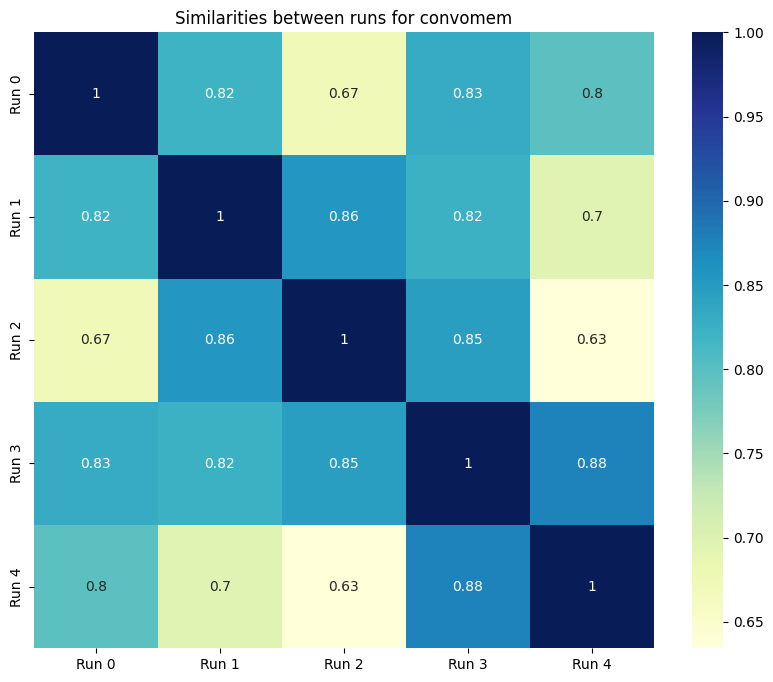

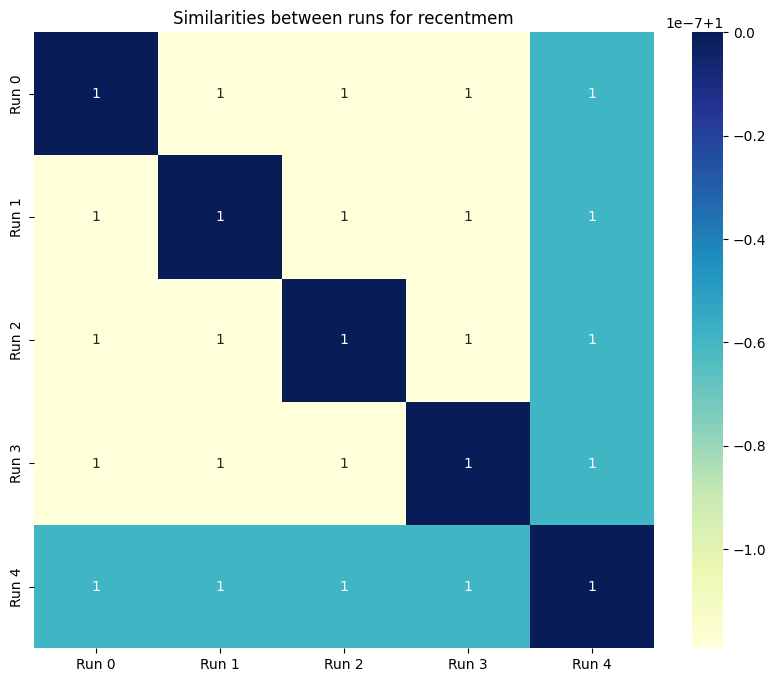

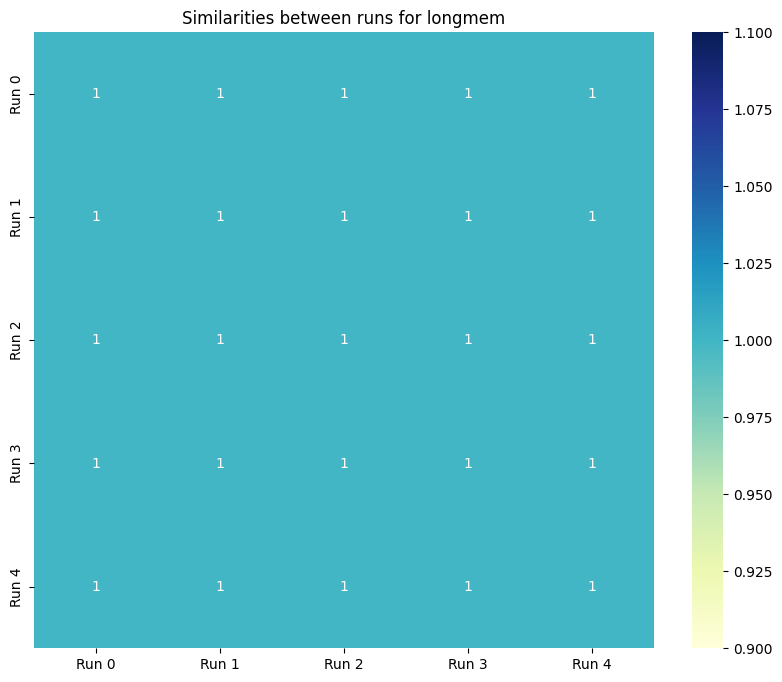

In [16]:
visualize_results(res)